# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
fname = r"Banana_Windows_x86_64\Banana.exe"
env = UnityEnvironment(file_name=fname)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain_name)

BananaBrain


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 5. Using the DQL Agent 
I am using the DQL Agent that we studied in our DQN Lesson.  I didn't make any modification to the agent. The following hyperparameters are used for the agent.  I started with the default hyper-parameters.  

#### Replay buffer size = 100,000
#### Mini-batch size = 64
#### Discount factor = 0.99
#### Soft update of target parameters = 1e-3
#### How often to update the network = 4

I tried to tweak mini-batch size to 128.  I didn't see any difference.

In [7]:
from dqn_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

### 5.1 Neural Network Architecture 
The DQN uses a Neural Network to estimate the Q-value, and we call this network QNetwork.  In this project, we used a simple feedforward network instead of convolutional network since we are not dealing with images as the input.  The input to the QNetwork is the state space, and the size is 37. There are two hidden layers, and the size of each hidden layer is set to 64.  The RELU activation function is applied to the two hidden layers. This is relatively simple feed-forward network.

One of the challenges of Reinforcement Learning (RL) has been to apply non-linear function approximator (e.g., neural network) to off-policy RL algorithms, such as Q-learning.  As mentioned in Mnihn et al 2015 nature paper, the DQN attempted to address a couple of challenges:
#### a) Correlations in Sequence
Since there exists a strong correlation in (S, A, R, S') tuples in an episode, the correlations make it difficult to train the neural network.  To address this issue, the experience replay is used.  The basic idea of the experience replay is to store a collection of (S, A, R, S') tuples in a buffer and use a random sample (a few of them) to perform the learning.  
#### b) Fixing Q Targets
As explained in the udacity video, we need to compute the TD error for Q learning.  To compute TD error, we use two separate networks instead of one network.   

#### The number of episodes is set to 2000. Though the project guideline mentions 1800, I extended by 200.

In [8]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

n_episodes=2000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores
eps = eps_start                    # initialize epsilon

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0] 
    score = 0
    while True:
        action = agent.act(state, eps).astype(int)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state, action, reward, next_state, done)

        score += reward                                # update the score
        state = next_state  
        if done:
            break 
    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=30.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        break

Episode 100	Average Score: 1.14
Episode 200	Average Score: 4.28
Episode 300	Average Score: 7.44
Episode 400	Average Score: 10.49
Episode 500	Average Score: 12.43
Episode 600	Average Score: 14.31
Episode 700	Average Score: 15.76
Episode 800	Average Score: 15.87
Episode 900	Average Score: 15.79
Episode 1000	Average Score: 15.49
Episode 1100	Average Score: 16.23
Episode 1200	Average Score: 16.02
Episode 1300	Average Score: 15.39
Episode 1400	Average Score: 15.41
Episode 1500	Average Score: 15.50
Episode 1600	Average Score: 15.69
Episode 1700	Average Score: 15.02
Episode 1800	Average Score: 15.85
Episode 1900	Average Score: 15.48
Episode 2000	Average Score: 16.73


### 6. Printing the average scores

In [9]:
print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))


Environment solved in 1900 episodes!	Average Score: 16.73


### 7. Plot the episode vs score
Comparing this plot with our benchmark plot, one can see the improvement. In the benchmark plot, the average score is around 15.  Based on the above average scores for various episodes, the average score of 15 is obtained after 700 episodes.

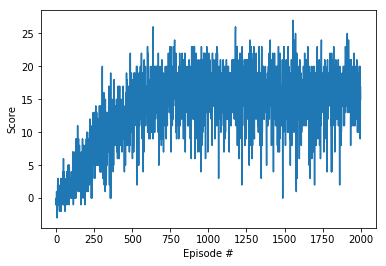

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 8. Saving the weights as a torch model
The model file is stored as model.pth

In [11]:
torch.save(agent.qnetwork_local.state_dict(), 'model.pth')

### 9. Loading the weights

In [12]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('model.pth'))

### 10. Using the trained model to simulate and plot the scores

Comparing this to random actions as shown above.  The average score is much higher than 0.

Score: 16.0


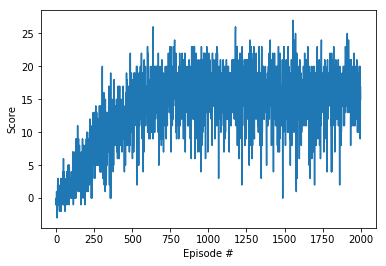

In [14]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state, 0.0).astype(int)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [15]:
env.close()

### 11. How to improve the agent's performance in future
We can do a couple of improvements to the DQN architecture as suggested in the paper entitled Rainbow: Combining Improvements in Deep Reinforcement Learning by Hessel et al. 2017

#### a) Prioritized Experience Replay
Instead of randomly sampling the (S A R S') tuples, we can prioritize the sampling process based on the TD error.
#### b) Double Q-learning
To mitigate the over-estimate problem in DQN, the double q-learning approach can be employed.